In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time


'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <link rel="manifest" href="/assets/next/manifest.json">\n    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>\n    <script src="/static/js/env-runtime.js" defer></script>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()</script>\n    <script>window.Prism=window.Prism||{},window.Prism.manual=!0</script>\n    <title>Top Companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2026 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta dat
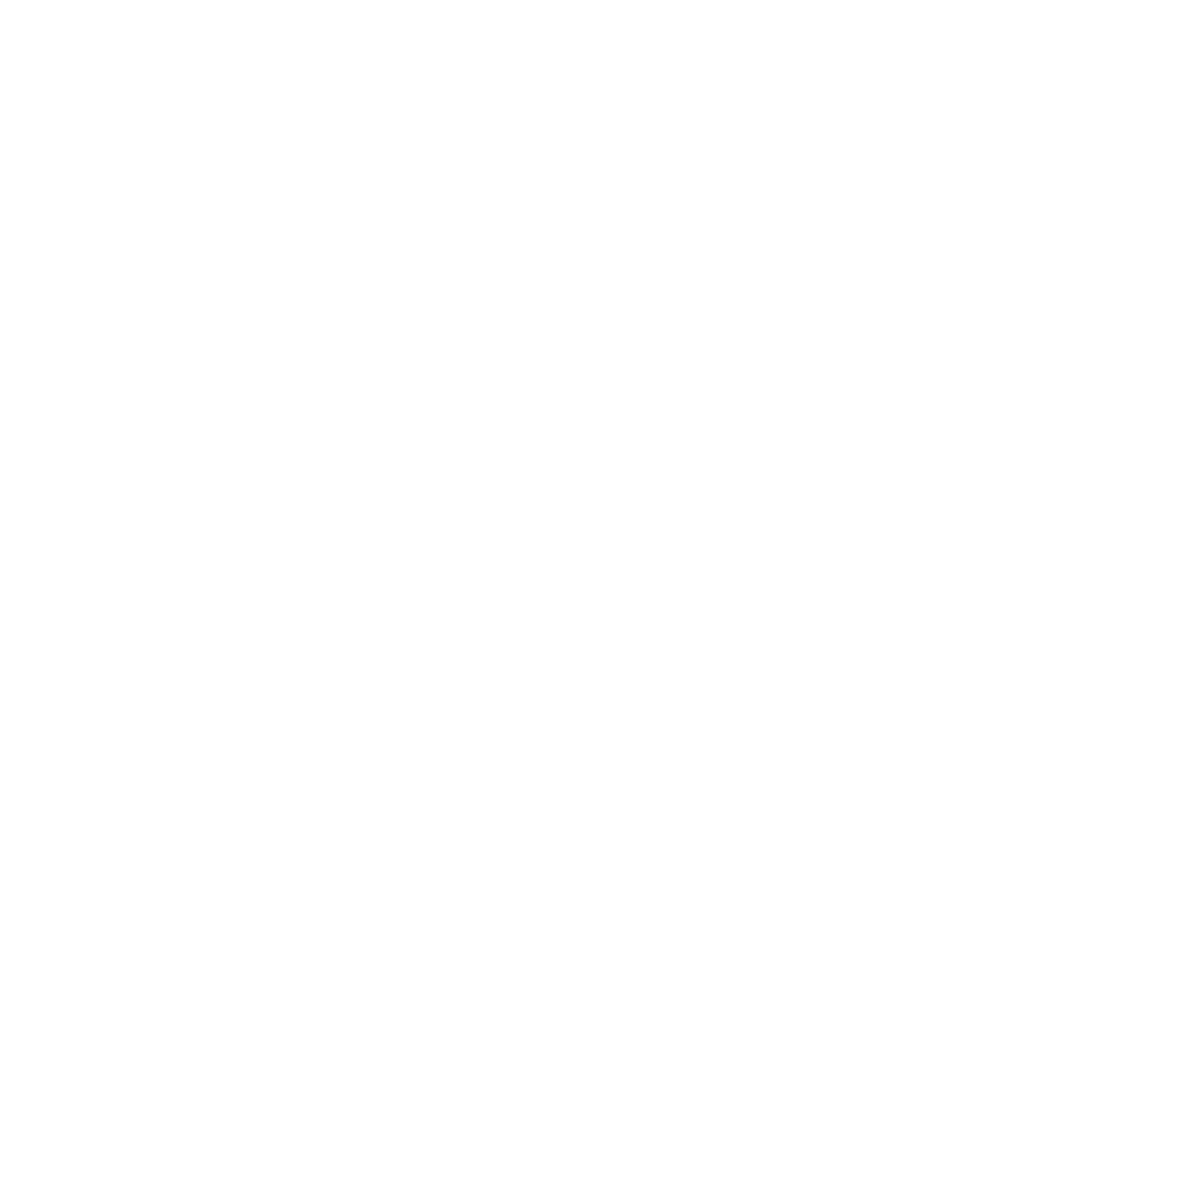

In [2]:
#requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page=1").text
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page=1",headers=headers).text

In [31]:
sessions = requests.Session()
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
company_names=[]
company_ratings=[]
company_info=[]
company_reviews=[]
company_salaries=[]
company_interviews=[]
company_jobs=[]
company_benefits=[]
company_highly_rated_for=[]
company_critically_rated_for=[]

def fetch_Data(companyId):
    url =f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={companyId}"
    try:
        response = sessions.get(url,headers=headers,timeout=5)
        response.raise_for_status()
        #print(response.text)
        webpage=response.text
        soup =BeautifulSoup(webpage,'html.parser')
        left= soup.find("div",class_="col-left")
        # Names of comapany
        names=left.findAll('h2')
        #rating
        ratings=left.findAll('div',class_="rating_text")
        #company_info
        infos=left.findAll('span', class_="companyCardWrapper__interLinking")

        
        # card info 

        company_cards=left.findAll('div',class_="companyCardWrapper__tertiaryInformation")

        # highly-critical
        high_low = left.findAll('div',class_="companyCardWrapper__ratingComparisonWrapper")
        print(high_low)
        
        
        
        for name in names:
            company_names.append(name.get_text(strip=True))
        for rating in ratings:
            company_ratings.append(rating.get_text(strip=True))
        for info in infos:
            company_info.append(info.get_text(strip=True))

        for card in company_cards:
           company_reviews.append(card.findAll('span')[0].get_text(strip=True))
           company_salaries.append(card.findAll('span')[2].get_text(strip=True))
           company_interviews.append(card.findAll('span')[4].get_text(strip=True))
           company_jobs.append(card.findAll('span')[6].get_text(strip=True))
           company_benefits.append(card.findAll('span')[8].get_text(strip=True))

        for items in high_low:
              high=items.find('span',class_="companyCardWrapper__ratingHeader--high")
             
              if high:
                 
                  company_highly_rated_for.append(items.find('span',class_="companyCardWrapper__ratingValues").get_text(strip=True))
            
                 
              else:
                  company_highly_rated_for.append('-')
            
              low = items.find('span',class_="companyCardWrapper__ratingHeader--critical")
              if low:
                  if high:
                      company_critically_rated_for.append(items.findAll('span',class_="companyCardWrapper__ratingValues")[1].get_text(strip=True))
                  else:
                      company_critically_rated_for.append(items.find('span',class_="companyCardWrapper__ratingValues").get_text(strip=True))
              else :
                  company_critically_rated_for.append('-')

              
    except Exception as e :
        print(f"Error for page {companyId} :{e}")

for i in range(1,500):
    fetch_Data(1)










[<div class="companyCardWrapper__ratingComparisonWrapper"><div><div class="companyCardWrapper__ratingHeader"><img alt="thumbsup logo" height="14px" src="https://static.ambitionbox.com/static/companyListing/ThumbsUp.svg" width="14px"/> <span class="companyCardWrapper__ratingHeader--high">Highly Rated For</span></div> <span class="companyCardWrapper__ratingValues">Job Security</span></div> <div><div class="companyCardWrapper__ratingHeader"><img alt="thumbsdown logo" height="14px" src="https://static.ambitionbox.com/static/companyListing/ThumbsDown.svg" width="14px"/> <span class="companyCardWrapper__ratingHeader--critical">Critically Rated For</span></div> <span class="companyCardWrapper__ratingValues">Promotions / Appraisal, Salary &amp; Benefits, Work Satisfaction</span></div></div>, <div class="companyCardWrapper__ratingComparisonWrapper"><!-- --> <div><div class="companyCardWrapper__ratingHeader"><img alt="thumbsdown logo" height="14px" src="https://static.ambitionbox.com/static/comp

In [32]:
data ={"Name":company_names,"ratings":company_ratings,"info":company_info,"reviews":company_reviews,
    "salaries":company_salaries,"interviews":company_interviews,
    "jobs":company_jobs,"benefits":company_benefits,"Praised for":company_highly_rated_for
    ,"Critisized for":company_critically_rated_for}
df = pd.DataFrame(data)

In [33]:
df.to_csv("companies.csv",index=False)

In [34]:
fr = pd.read_csv("companies.csv",usecols=['Name',"ratings","info","reviews","salaries"])
fr

Name  ratings  \
0                 TCS      3.3   
1           Accenture      3.7   
2               Wipro      3.6   
3           Cognizant      3.6   
4           Capgemini      3.7   
...               ...      ...   
7175           Amazon      3.9   
7176       iEnergizer      4.6   
7177  Reliance Retail      3.9   
7178      LTIMindtree      3.6   
7179              IBM      3.9   

                                                   info reviews salaries  
0     IT Services & Consulting | Bangalore / Bengalu...    1.1L     9.8L  
1     IT Services & Consulting | Bangalore / Bengalu...   71.3k     6.5L  
2     IT Services & Consulting | Hyderabad / Secunde...   63.5k     4.8L  
3     IT Services & Consulting | Hyderabad / Secunde...   59.8k       6L  
4     IT Services & Consulting | Bangalore / Bengalu...   51.4k     4.8L  
...                                                 ...     ...      ...  
7175  Internet | Bangalore / Bengaluru +516 other lo...   30.6k     1.5L  
7176                    BPO | Noida +51 other locations   27.1k      24k  
7177              Retail | Mumbai +1154 other locations     27k      75k  
7178  IT Services & Consulting | Bangalore / Bengalu...   25.8k     1.9L  
7179  IT Services & Consulting | Bangalore / Bengalu...   25.3k     2.1L  

[7180 rows x 5 columns]